In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab
import math
from scipy import stats
from scipy.stats import linregress
import scipy.stats as sts
from sklearn import datasets

In [16]:
act_df = pd.read_csv('demo_act.csv')
act_df.set_index('CDS_CODE')

#Drop redundant columns
act_df.drop(columns=['Unnamed: 0'], inplace=True)

#Fill last of the Null Values with zeros
act_df.fillna(0,inplace=True)

act_df.columns


Index(['CDS_CODE', 'RTYPE', 'SCHOOL', 'DISTRICT', 'COUNTY', '#_12_ENROLL',
       '#_ACT_TESTS', 'AVG_ENG_SCR', 'AVG_READ_SCR', 'AVG_MATH_SCR',
       'AVG_SCI_SCR', '#_ACT_PASS', 'PCNT_ACT_PASS', 'OTHER',
       'AMERICAN_INDIAN', 'ASIAN', 'PACIFIC_ISLANDER', 'FILIPINO', 'LATINO',
       'AFRICAN_AMERICAN', 'WHITE', 'MULTI_RACE'],
      dtype='object')

In [17]:
#Verify there are more Nulls
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 22 columns):
CDS_CODE            1075 non-null int64
RTYPE               1075 non-null object
SCHOOL              1075 non-null object
DISTRICT            1075 non-null object
COUNTY              1075 non-null object
#_12_ENROLL         1075 non-null int64
#_ACT_TESTS         1075 non-null int64
AVG_ENG_SCR         1075 non-null int64
AVG_READ_SCR        1075 non-null int64
AVG_MATH_SCR        1075 non-null int64
AVG_SCI_SCR         1075 non-null int64
#_ACT_PASS          1075 non-null int64
PCNT_ACT_PASS       1075 non-null float64
OTHER               1075 non-null float64
AMERICAN_INDIAN     1075 non-null float64
ASIAN               1075 non-null float64
PACIFIC_ISLANDER    1075 non-null float64
FILIPINO            1075 non-null float64
LATINO              1075 non-null float64
AFRICAN_AMERICAN    1075 non-null float64
WHITE               1075 non-null float64
MULTI_RACE          1075 non-nu

In [18]:
#created a list of total students at each school
act_df['STUDENT_TOTAL'] = act_df['OTHER'] + act_df['AMERICAN_INDIAN'] + act_df['ASIAN'] + act_df['PACIFIC_ISLANDER'] + act_df['FILIPINO']  + act_df['LATINO'] + act_df['LATINO'] + act_df['AFRICAN_AMERICAN'] + act_df['WHITE'] + act_df['MULTI_RACE']
act_df.head(1)

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,...,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE,STUDENT_TOTAL
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,...,0.0,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0,615.0


In [19]:
#combined 'other' groups #combined 'Asians' to match census data
act_df['OTHER_TOTAL'] = act_df['OTHER'] + act_df['MULTI_RACE']
act_df['ASIANS_TOTAL'] = act_df['ASIAN'] + act_df['FILIPINO']
act_df.head(1)

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,...,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE,STUDENT_TOTAL,OTHER_TOTAL,ASIANS_TOTAL
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,...,8.0,5.0,1.0,212.0,150.0,18.0,4.0,615.0,4.0,9.0


In [20]:
#create percentages of students at schools by ethnicity, rounded by 2
act_df['OTHER_PERCENT'] = round(act_df['OTHER_TOTAL'] / act_df['STUDENT_TOTAL']*100, 2)
act_df['ASIANS_PERCENT'] = round(act_df['ASIANS_TOTAL'] / act_df['STUDENT_TOTAL']*100, 2)
act_df['PACIFIC_ISLANDER_PERCENT'] = round(act_df['PACIFIC_ISLANDER'] / act_df['STUDENT_TOTAL']*100, 2)
act_df['AMERICAN_INDIAN_PERCENT'] = round(act_df['AMERICAN_INDIAN'] / act_df['STUDENT_TOTAL']*100, 2)
act_df['LATINO_PERCENT'] = round(act_df['LATINO'] / act_df['STUDENT_TOTAL']*100, 2)
act_df['AFRICAN_AMERICAN_PERCENT'] = round(act_df['AFRICAN_AMERICAN'] / act_df['STUDENT_TOTAL']*100, 2)
act_df['WHITE_PERCENT'] = round(act_df['WHITE'] / act_df['STUDENT_TOTAL']*100, 2)
act_df.head(1)

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,...,STUDENT_TOTAL,OTHER_TOTAL,ASIANS_TOTAL,OTHER_PERCENT,ASIANS_PERCENT,PACIFIC_ISLANDER_PERCENT,AMERICAN_INDIAN_PERCENT,LATINO_PERCENT,AFRICAN_AMERICAN_PERCENT,WHITE_PERCENT
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,...,615.0,4.0,9.0,0.65,1.46,0.81,0.81,34.47,24.39,2.93


In [21]:
#Aded Latino Majority for categorical data to be used later. 39 is the CA population average for Latinos
act_df['LATINO_MAJORITY'] = act_df.LATINO_PERCENT > 39
act_df['LATINO_MAJORITY'].value_counts()

False    656
True     419
Name: LATINO_MAJORITY, dtype: int64

In [22]:
#remove columns not to be used in analysis
act_df.columns


Index(['CDS_CODE', 'RTYPE', 'SCHOOL', 'DISTRICT', 'COUNTY', '#_12_ENROLL',
       '#_ACT_TESTS', 'AVG_ENG_SCR', 'AVG_READ_SCR', 'AVG_MATH_SCR',
       'AVG_SCI_SCR', '#_ACT_PASS', 'PCNT_ACT_PASS', 'OTHER',
       'AMERICAN_INDIAN', 'ASIAN', 'PACIFIC_ISLANDER', 'FILIPINO', 'LATINO',
       'AFRICAN_AMERICAN', 'WHITE', 'MULTI_RACE', 'STUDENT_TOTAL',
       'OTHER_TOTAL', 'ASIANS_TOTAL', 'OTHER_PERCENT', 'ASIANS_PERCENT',
       'PACIFIC_ISLANDER_PERCENT', 'AMERICAN_INDIAN_PERCENT', 'LATINO_PERCENT',
       'AFRICAN_AMERICAN_PERCENT', 'WHITE_PERCENT', 'LATINO_MAJORITY'],
      dtype='object')

In [23]:
#Produce descriptives of the sample 
act_df.describe()

,CDS_CODE,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,AVG_SCI_SCR,#_ACT_PASS,PCNT_ACT_PASS,OTHER,...,STUDENT_TOTAL,OTHER_TOTAL,ASIANS_TOTAL,OTHER_PERCENT,ASIANS_PERCENT,PACIFIC_ISLANDER_PERCENT,AMERICAN_INDIAN_PERCENT,LATINO_PERCENT,AFRICAN_AMERICAN_PERCENT,WHITE_PERCENT
count,1.075000e+03,1075.000000,1075.000000,1075.00000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,...,1075.000000,1075.000000,1075.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,2.882025e+13,365.450233,91.423256,20.95907,21.786047,21.285581,21.050233,51.780465,51.470995,7.835349,...,2426.266977,51.515349,208.638140,2.397747,8.632821,0.339516,0.396657,33.078222,4.015326,18.061359
std,1.350488e+13,210.295646,76.268127,4.05757,3.616483,3.349772,3.193232,59.382626,26.032129,17.393781,...,1339.301062,58.648707,329.590297,2.565019,12.610445,0.467170,0.808331,12.496399,6.715532,19.082557
min,1.100170e+12,17.000000,15.000000,10.00000,11.000000,14.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.570000,0.000000,0.000000
25%,1.964733e+13,163.500000,38.000000,18.00000,19.000000,19.000000,19.000000,14.000000,29.685000,0.000000,...,1269.000000,9.000000,21.000000,0.450000,1.285000,0.070000,0.090000,23.740000,0.750000,2.242500
50%,3.066548e+13,371.000000,70.000000,21.00000,22.000000,21.000000,21.000000,29.000000,52.940000,1.000000,...,2358.000000,33.000000,86.000000,1.515000,3.790000,0.190000,0.210000,35.090000,1.795000,10.815000
75%,3.768411e+13,519.000000,120.000000,24.00000,24.500000,24.000000,23.000000,63.000000,73.655000,7.500000,...,3295.500000,73.000000,242.000000,3.617500,10.267500,0.430000,0.390000,44.387500,4.857500,30.012500
max,5.872770e+13,1139.000000,660.000000,32.00000,31.000000,32.000000,31.000000,375.000000,97.700000,186.000000,...,8968.000000,564.000000,2303.000000,22.000000,90.910000,3.140000,8.710000,49.870000,89.440000,79.950000


In [24]:
#Multicolinearity test to see if there are any highly correlated variables
correlation = act_df.corr(method='pearson')
display(correlation)

,CDS_CODE,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,AVG_SCI_SCR,#_ACT_PASS,PCNT_ACT_PASS,OTHER,...,OTHER_TOTAL,ASIANS_TOTAL,OTHER_PERCENT,ASIANS_PERCENT,PACIFIC_ISLANDER_PERCENT,AMERICAN_INDIAN_PERCENT,LATINO_PERCENT,AFRICAN_AMERICAN_PERCENT,WHITE_PERCENT,LATINO_MAJORITY
CDS_CODE,1.000000,0.061427,0.003285,0.148395,0.153011,0.146184,0.162102,0.028860,0.174704,0.006592,...,0.097777,-0.016693,0.103923,-0.007161,0.049427,0.090461,-0.092823,-0.150518,0.160264,-0.148798
#_12_ENROLL,0.061427,1.000000,0.524767,0.324499,0.331604,0.371774,0.347697,0.538741,0.336978,0.165214,...,0.461722,0.485318,0.020062,0.253184,0.062614,-0.152803,-0.160651,-0.062450,0.067341,-0.150521
#_ACT_TESTS,0.003285,0.524767,1.000000,0.276967,0.243212,0.316823,0.279619,0.796115,0.238161,0.068721,...,0.368232,0.388239,0.143155,0.290257,-0.028406,-0.152373,-0.268290,-0.067706,0.171332,-0.118732
AVG_ENG_SCR,0.148395,0.324499,0.276967,1.000000,0.978399,0.960188,0.971949,0.676763,0.964683,0.080486,...,0.477749,0.489409,0.495128,0.532756,0.067224,0.065368,-0.760725,-0.209999,0.647234,-0.619788
AVG_READ_SCR,0.153011,0.331604,0.243212,0.978399,1.000000,0.946723,0.968049,0.645010,0.965303,0.085334,...,0.480894,0.457036,0.500482,0.492122,0.077807,0.103691,-0.757519,-0.215323,0.669161,-0.625467
AVG_MATH_SCR,0.146184,0.371774,0.316823,0.960188,0.946723,1.000000,0.966699,0.702568,0.951405,0.081333,...,0.477539,0.557033,0.462606,0.590626,0.079951,0.057181,-0.756998,-0.226344,0.614260,-0.603092
AVG_SCI_SCR,0.162102,0.347697,0.279619,0.971949,0.968049,0.966699,1.000000,0.679601,0.960230,0.079777,...,0.478509,0.499425,0.488963,0.536959,0.078227,0.081731,-0.760444,-0.233148,0.652099,-0.614962
#_ACT_PASS,0.028860,0.538741,0.796115,0.676763,0.645010,0.702568,0.679601,1.000000,0.634705,0.103149,...,0.538095,0.569538,0.344925,0.498123,-0.002566,-0.091123,-0.594999,-0.130886,0.453752,-0.396905
PCNT_ACT_PASS,0.174704,0.336978,0.238161,0.964683,0.965303,0.951405,0.960230,0.634705,1.000000,0.093425,...,0.491168,0.448828,0.497389,0.480133,0.072230,0.109255,-0.763747,-0.221216,0.687624,-0.650932
OTHER,0.006592,0.165214,0.068721,0.080486,0.085334,0.081333,0.079777,0.103149,0.093425,1.000000,...,0.331849,0.105692,0.325094,0.071826,0.042750,-0.018970,-0.111254,0.013913,0.049415,-0.104994


In [25]:
#Fill last of the Null Values with zeros
act_df.fillna(0,inplace=True)
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 33 columns):
CDS_CODE                    1075 non-null int64
RTYPE                       1075 non-null object
SCHOOL                      1075 non-null object
DISTRICT                    1075 non-null object
COUNTY                      1075 non-null object
#_12_ENROLL                 1075 non-null int64
#_ACT_TESTS                 1075 non-null int64
AVG_ENG_SCR                 1075 non-null int64
AVG_READ_SCR                1075 non-null int64
AVG_MATH_SCR                1075 non-null int64
AVG_SCI_SCR                 1075 non-null int64
#_ACT_PASS                  1075 non-null int64
PCNT_ACT_PASS               1075 non-null float64
OTHER                       1075 non-null float64
AMERICAN_INDIAN             1075 non-null float64
ASIAN                       1075 non-null float64
PACIFIC_ISLANDER            1075 non-null float64
FILIPINO                    1075 non-null float64
LATINO       

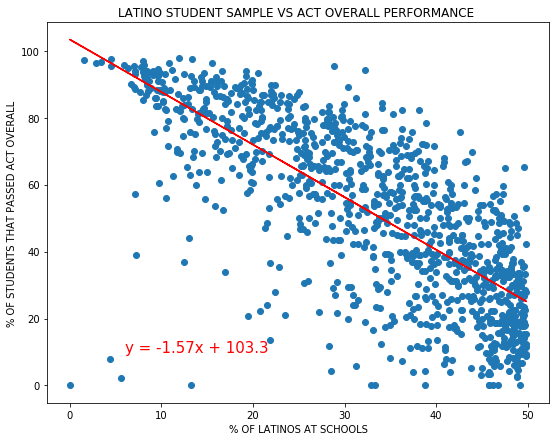

The r-squared is: 0.57
The p-value is: 0.0


In [26]:
# scatter showing test group (Latinos) that met or exceed scores performance standards - Overall.
# Print out the r-squared value along with the plot.
x_values = act_df['LATINO_PERCENT']
y_values = act_df['PCNT_ACT_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('LATINO STUDENT SAMPLE VS ACT OVERALL PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF LATINOS AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT PASSED ACT OVERALL')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")

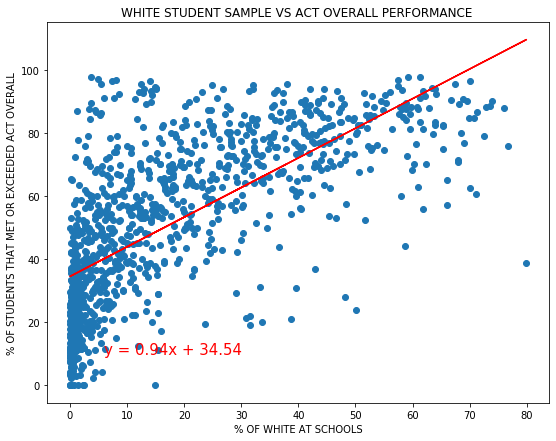

The r-squared is: 0.473
The p-value is: 0.0


In [27]:
#scatter showing comparison group (ie, Whites) that met or exceed scores performance standards - Overall.
# Print out the r-squared value along with the plot.
x_values = act_df['WHITE_PERCENT']
y_values = act_df['PCNT_ACT_PASS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,7))
plt.title('WHITE STUDENT SAMPLE VS ACT OVERALL PERFORMANCE ')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('% OF WHITE AT SCHOOLS')
plt.ylabel('% OF STUDENTS THAT MET OR EXCEEDED ACT OVERALL')
plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")
print(f"The p-value is: {round(pvalue, 3)}")


In [28]:
### -- END OF ANALYSIS -- ###